In [1]:
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from util import *

%matplotlib inline

In [2]:
with open('./dataset/ck.plus.pickle','rb') as f:
    ck_data, ck_label = pickle.load(f)
    
ck_data_train, ck_data_test, ck_label_train, ck_label_test = train_test_split(ck_data, ck_label, test_size=0.25, random_state=42)

In [3]:
get_face_label()

['😐', '😠', '😏', '😷', '😨', '😀', '😢', '😱']

In [4]:
pca = PCA(n_components=400, svd_solver='randomized', whiten=True).fit(ck_data_train)
ck_data_train_pca = pca.transform(ck_data_train)
ck_data_test_pca = pca.transform(ck_data_test)

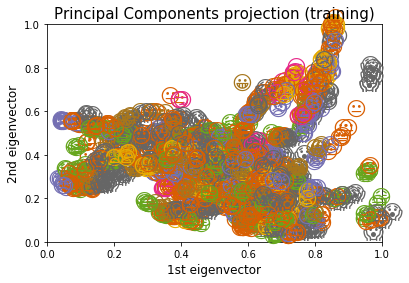

In [5]:
plot_face(ck_data_train_pca, ck_label_train, 'Principal Components projection (training)', xlabel='1st eigenvector', ylabel='2nd eigenvector')

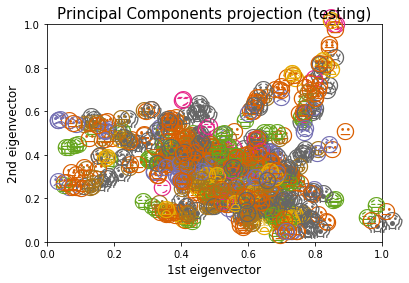

In [6]:
plot_face(ck_data_test_pca, ck_label_test, 'Principal Components projection (testing)', xlabel='1st eigenvector', ylabel='2nd eigenvector')

              precision    recall  f1-score   support

           😐       0.96      0.99      0.97       323
           😠       1.00      0.99      0.99        90
           😏       1.00      0.91      0.95        23
           😷       0.99      0.97      0.98        86
           😨       1.00      0.98      0.99        42
           😀       0.99      1.00      1.00       129
           😢       0.96      1.00      0.98        44
           😱       1.00      0.94      0.97       121

   micro avg       0.98      0.98      0.98       858
   macro avg       0.99      0.97      0.98       858
weighted avg       0.98      0.98      0.98       858

Accuracy:  0.9790209790209791
Normalized confusion matrix


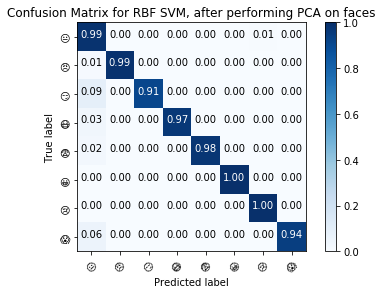

In [7]:
target_classes = get_face_label()

clf = SVC(kernel='rbf', class_weight='balanced', gamma=0.0001, C=1000.0)

clf = clf.fit(ck_data_train_pca, ck_label_train)
ck_label_predict = clf.predict(ck_data_test_pca)

print(classification_report(ck_label_test, ck_label_predict, target_names=target_classes))
print('Accuracy: ' , accuracy_score(ck_label_test, ck_label_predict))

cm = confusion_matrix(ck_label_test, ck_label_predict, labels=range(8))
plot_confusion_matrix(cm, classes=target_classes, title='Confusion Matrix for RBF SVM, after performing PCA on faces', normalize=True)